## Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

### Read data

In [3]:
data = pd.read_csv("Churn_Modeling.csv")
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2913,2914,15697686,Stewart,787,France,Female,40,6,0.00,2,1,1,84151.98,0
4803,4804,15610002,Chidubem,802,Spain,Male,41,5,0.00,2,1,1,134626.30,0
8012,8013,15702715,Kao,747,France,Female,34,10,0.00,2,1,1,50759.80,0
8037,8038,15573045,Earl,547,France,Male,62,10,127738.75,2,1,1,85153.00,0
4532,4533,15739194,Manfrin,548,Spain,Male,38,0,178056.54,2,1,0,38434.73,0


### Exploratory data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
## Graphs of churned  customers in different Geographies

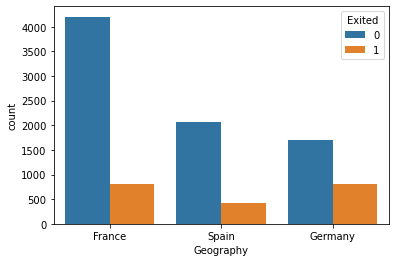

In [7]:
sns.countplot(data=data, x="Geography", hue="Exited")
plt.show()

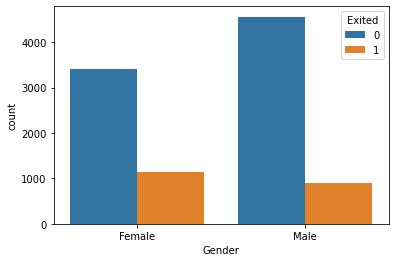

In [9]:
sns.countplot(data=data, x="Gender", hue="Exited")
plt.show()

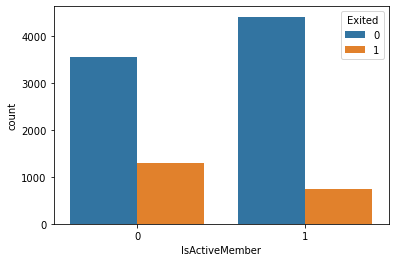

In [11]:
sns.countplot(data=data, x="IsActiveMember", hue="Exited")
plt.show()

In [12]:
data.shape

(10000, 14)

In [13]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [50]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
# distribution of customers who churn

data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

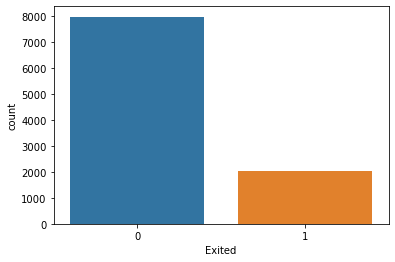

In [16]:
sns.countplot(data=data, x="Exited")
plt.show()

In [17]:
# check the nulls
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
# Compare the values for both churns
data.groupby('Exited').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


### Data Preprocessing

In [19]:
df = data.copy()

In [20]:
## Encoding the data
from sklearn.preprocessing import LabelEncoder

cat_cols =[x for x in df.columns if df[x].dtype=="object"]

le=LabelEncoder()

df = df.apply(lambda cat_cols: le.fit_transform(cat_cols.astype(str)), axis=0, result_type='expand')

In [22]:
df.drop(columns="CustomerId",inplace=True)

In [23]:
df.sample(5)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2775,1975,1125,459,2,1,33,4,770,1,1,1,1385,1
8186,7987,63,215,0,0,21,4,0,1,1,0,7206,1
7725,7475,2662,91,0,0,17,6,3712,1,0,0,540,0
6333,5929,1761,243,0,1,16,9,397,0,1,1,1304,0
8603,8451,929,160,0,0,41,3,4410,0,1,0,3305,1


In [24]:
X = df.drop(columns = 'Exited',axis = 1)
y = df['Exited']

### Modelling

In [39]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


In [53]:
lr =  LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train,y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
lr_preds = lr.predict(X_test)
dt_preds = dt.predict(X_test)

In [56]:
lr_pred = accuracy_score(lr_preds, y_test)
dt_pred = accuracy_score(dt_preds, y_test)
print(lr_pred)
print(dt_pred)


0.806
0.7775


In [20]:
# Create new data out of the samples
df.to_csv("geo_data1.csv")
df.to_csv("geo_data2.csv")

In [32]:
# shuffle the data

df_shuffled = shuffle(df, random_state=42)

In [33]:
sample_size = 5000
s_size = 7000

In [34]:
sample1 = df_shuffled[:sample_size].copy()

In [35]:
sample2 = df_shuffled[sample_size:].copy()

In [46]:
sample1.shape

(5000, 13)

In [47]:
sample2.shape

(5000, 13)

In [44]:
# Create new data out of the samples
sample1.to_csv("data3.csv")
sample2.to_csv("data4.csv")

In [48]:
df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [49]:
df1 = df_shuffled[df_shuffled['Geography'] == 0] 
df2 = df_shuffled[df_shuffled['Geography'] == 1] 
df3 = df_shuffled[df_shuffled['Geography'] == 2] 
print(df1.shape)
print(df2.shape)
print(df3.shape)

(5014, 13)
(2509, 13)
(2477, 13)


In [51]:
# Create new data out of the samples
df1.to_csv("france.csv")
df2.to_csv("germany.csv")
df3.to_csv('spain.csv')

In [63]:
df_shuffled.to_csv("data5.csv")